# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.



In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
loan_data = pd.read_csv(
    r'C:\Users\leonh\Data_Visualization_And_Modeling_Online-\Data_Visualization_And_Modeling_Online-c1942be6fc3feb47cd814c05d26735732622bc01\Lab\loan_data.csv'
)

In [5]:
# Set plot style
sns.set(style="whitegrid")

# ## 1. Age vs Loan Status
# Boxplot to visualize how applicant age relates to loan approval.

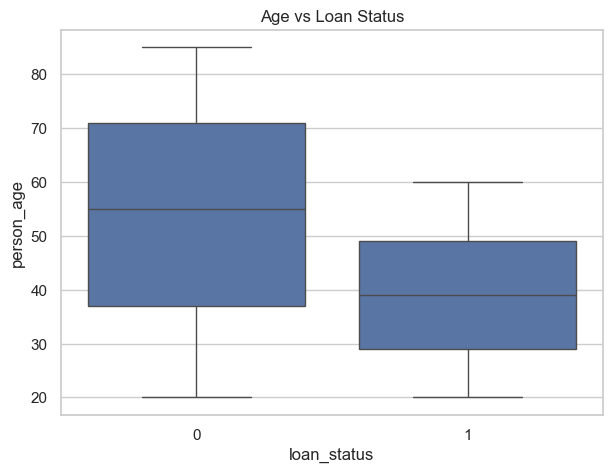

In [6]:
# =========================
# 1. Age vs Loan Status
# =========================
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_status', y='person_age', data=loan_data)
plt.title('Age vs Loan Status')
plt.show()

# **Interpretation:** Older applicants (>60) appear to have very low approval rates, which may indicate a bias against age.


# ## 2. Gender vs Loan Status
# Countplot to examine approval differences between genders.

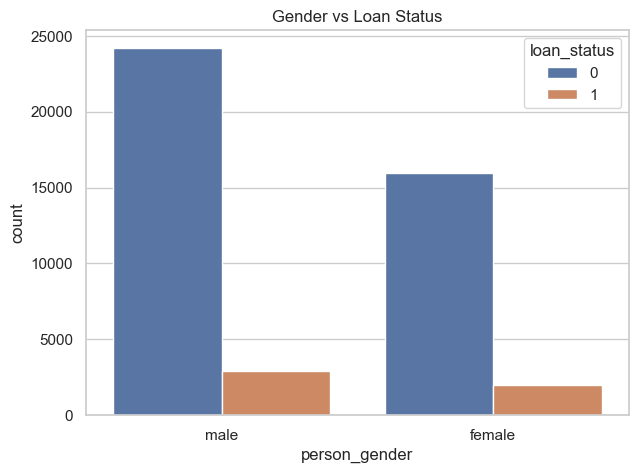

In [7]:
# =========================
# 2. Gender vs Loan Status
# =========================
plt.figure(figsize=(7,5))
sns.countplot(x='person_gender', hue='loan_status', data=loan_data)
plt.title('Gender vs Loan Status')
plt.show()

# ## 3. Income vs Loan Status
# Higher income is expected to increase approval likelihood.

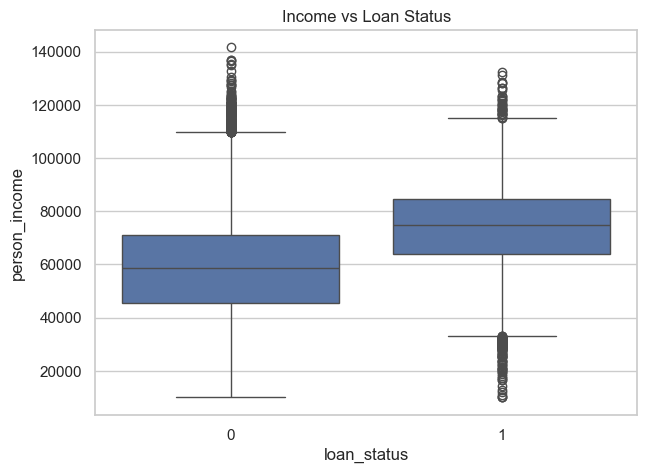

In [8]:
# =========================
# 3. Income vs Loan Status
# =========================
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_status', y='person_income', data=loan_data)
plt.title('Income vs Loan Status')
plt.show()

# ## 4. Credit Score vs Loan Status
# Boxplot to visualize the effect of credit score on loan approval.

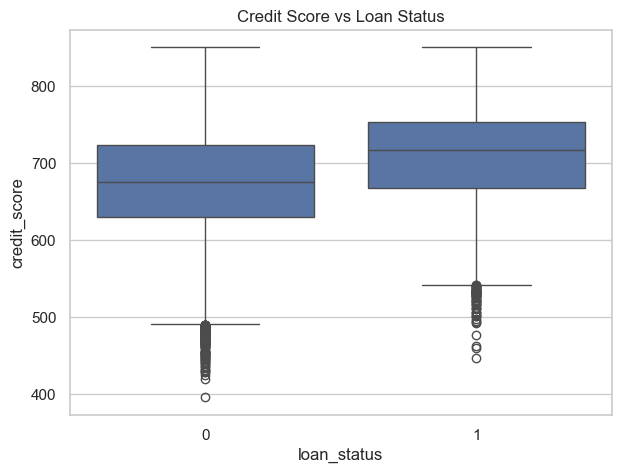

In [9]:
# =========================
# 4. Credit Score vs Loan Status
# =========================
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_status', y='credit_score', data=loan_data)
plt.title('Credit Score vs Loan Status')
plt.show()

# ## 5. Loan Amount vs Loan Status
# Larger loan amounts may be harder to approve.

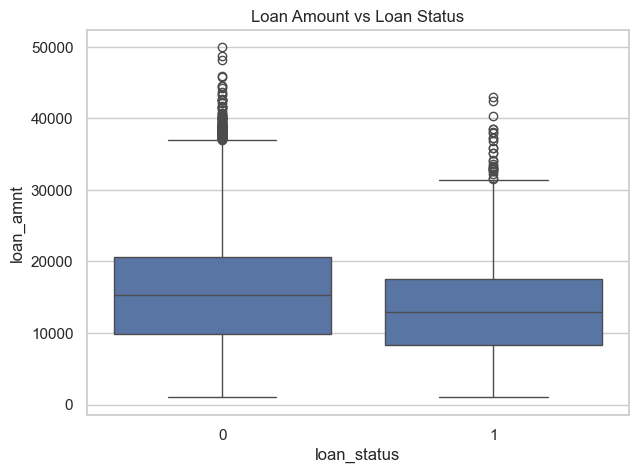

In [10]:
# =========================
# 5. Loan Amount vs Loan Status
# =========================
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_data)
plt.title('Loan Amount vs Loan Status')
plt.show()

# ## 6. Employment Experience vs Loan Status
# More experienced applicants may have higher approval rates.

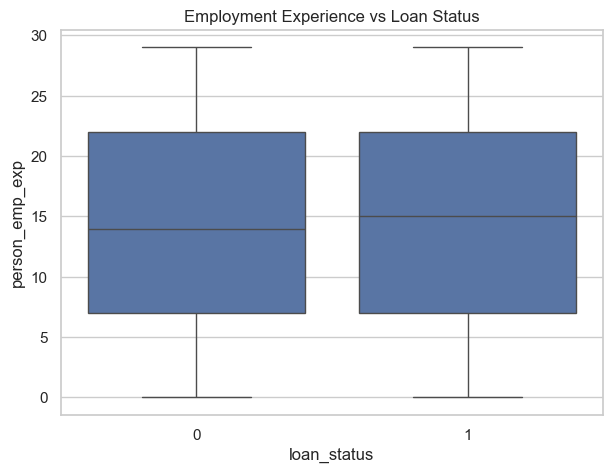

In [11]:
# =========================
# 6. Employment Experience vs Loan Status
# =========================
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_status', y='person_emp_exp', data=loan_data)
plt.title('Employment Experience vs Loan Status')
plt.show()

# ## 7. Loan Percent of Income vs Loan Status
# Shows how risky the loan is relative to the applicant's income.

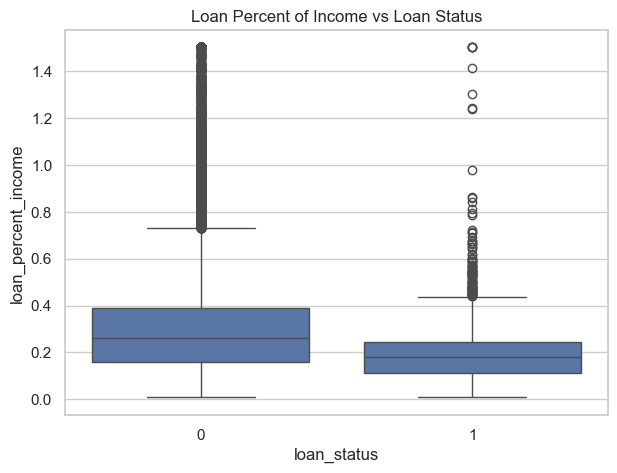

In [12]:
# =========================
# 7. Loan Percent of Income vs Loan Status
# =========================
plt.figure(figsize=(7,5))
sns.boxplot(x='loan_status', y='loan_percent_income', data=loan_data)
plt.title('Loan Percent of Income vs Loan Status')
plt.show()

# ## 8. Education vs Loan Status
# Countplot to show approval distribution by education level.

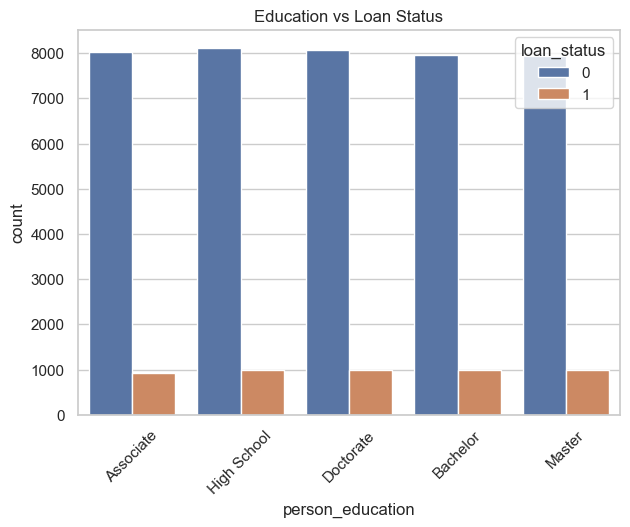

In [16]:
# Education vs Loan Status
plt.figure(figsize=(7,5))
sns.countplot(x='person_education', hue='loan_status', data=loan_data)
plt.title('Education vs Loan Status')
plt.xticks(rotation=45)
plt.show()

# ## 9. Home Ownership vs Loan Status
# Examines whether owning or renting a home affects loan approval.

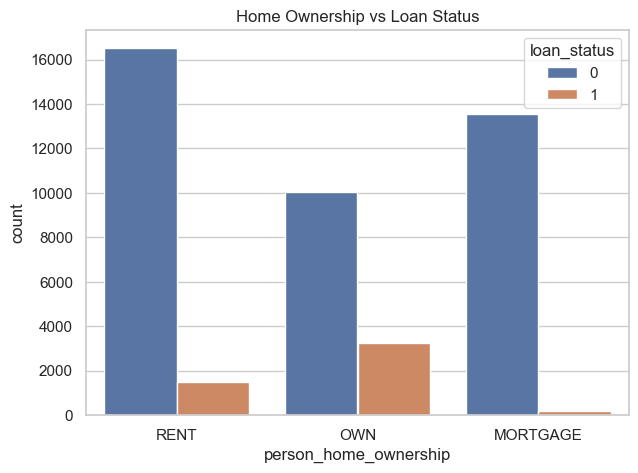

In [17]:
# Home Ownership vs Loan Status
plt.figure(figsize=(7,5))
sns.countplot(x='person_home_ownership', hue='loan_status', data=loan_data)
plt.title('Home Ownership vs Loan Status')
plt.show()

# ## 10. Loan Intent vs Loan Status
# Shows which loan purposes are more likely to be approved.

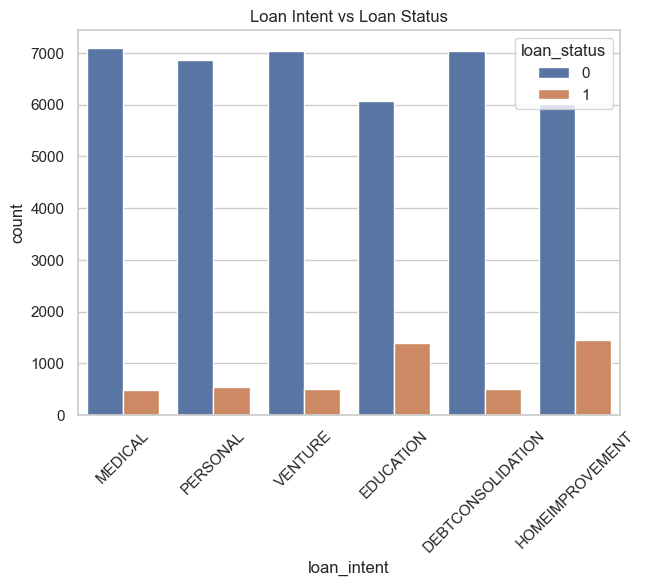

In [18]:
# Loan Intent vs Loan Status
plt.figure(figsize=(7,5))
sns.countplot(x='loan_intent', hue='loan_status', data=loan_data)
plt.title('Loan Intent vs Loan Status')
plt.xticks(rotation=45)
plt.show()

# ## 11. Previous Loan Defaults vs Loan Status
# Applicants with previous defaults may have lower approval rates.

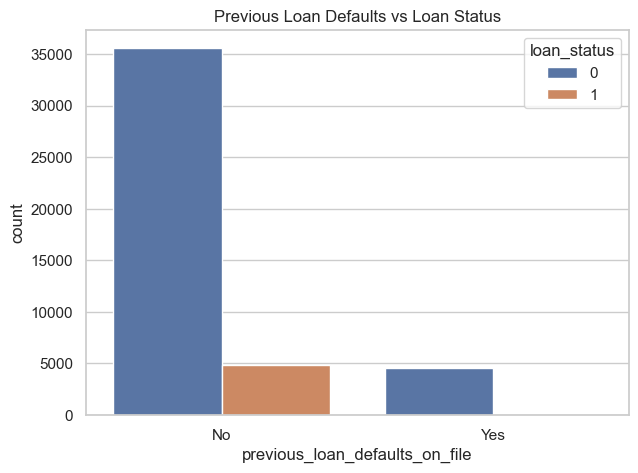

In [19]:
# Previous Loan Defaults vs Loan Status
plt.figure(figsize=(7,5))
sns.countplot(x='previous_loan_defaults_on_file', hue='loan_status', data=loan_data)
plt.title('Previous Loan Defaults vs Loan Status')
plt.show()

# ## 12. Approval Rates by Gender
# Numeric calculation and bar plot to compare approval rates.

In [13]:
# =========================
# 8. Approval Rates by Gender
# =========================
gender_approval = loan_data.groupby('person_gender')['loan_status'].mean()
print("Approval Rates by Gender:")
print(gender_approval)

Approval Rates by Gender:
person_gender
female    0.110280
male      0.107711
Name: loan_status, dtype: float64


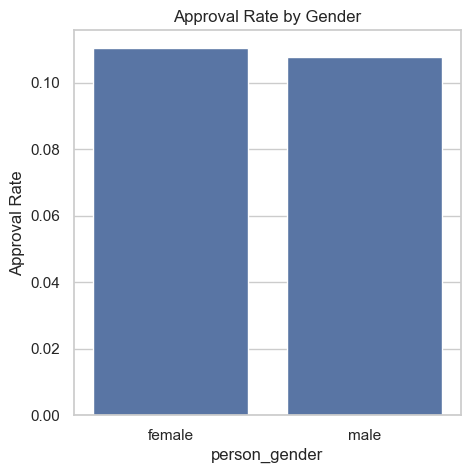

In [20]:
# Bar plot
plt.figure(figsize=(5,5))
sns.barplot(x=gender_approval.index, y=gender_approval.values)
plt.title('Approval Rate by Gender')
plt.ylabel('Approval Rate')
plt.show()

# ## 13. Approval Rates by Age Group
# Grouping by age ranges to see approval percentages.

In [15]:
# =========================
# 9. Approval Rates by Age Groups
# =========================
age_bins = [18, 30, 40, 50, 60, 100]
loan_data['age_group'] = pd.cut(loan_data['person_age'], bins=age_bins)
age_approval = loan_data.groupby('age_group')['loan_status'].mean()
print("\nApproval Rates by Age Group:")
print(age_approval)


Approval Rates by Age Group:
age_group
(18, 30]     0.182411
(30, 40]     0.176479
(40, 50]     0.174631
(50, 60]     0.166140
(60, 100]    0.000000
Name: loan_status, dtype: float64


C:\Users\leonh\AppData\Local\Temp\ipykernel_112664\2366429765.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_approval = loan_data.groupby('age_group')['loan_status'].mean()


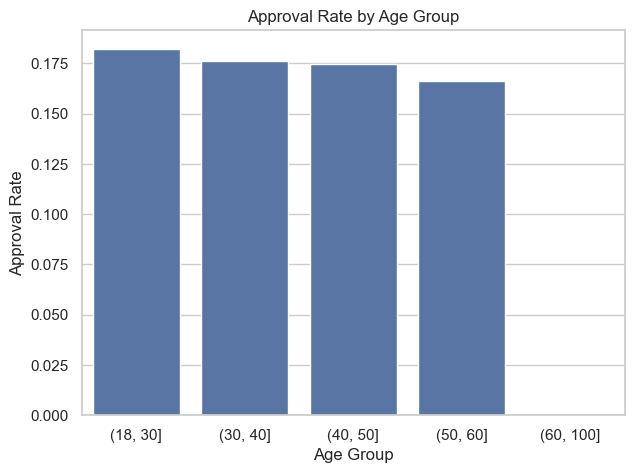

In [21]:
# Bar plot
plt.figure(figsize=(7,5))
sns.barplot(x=age_approval.index.astype(str), y=age_approval.values)
plt.title('Approval Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Approval Rate')
plt.show()

# ## 14. Summary of Findings
# - **Most influential features**: `credit_score`, `person_income`, `loan_percent_income`, `loan_amnt`, `person_emp_exp`  
# - **Least influential features**: `person_age` and `person_gender` (these should ideally not affect approval decisions)  
# - **Potential ethical concerns**:
#     - Applicants over 60 have 0% approval → potential age discrimination   
# - The financial institution should investigate and mitigate bias in the model before deployment.